In [1]:
pip install stats-can

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fredapi

In [3]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
import matplotlib.pyplot as plt  
import stats_can
from fredapi import Fred
fred = Fred(api_key='8c903d365112e33ab2f349310ee84d72')

In [4]:
SP500 = fred.get_series('SP500')

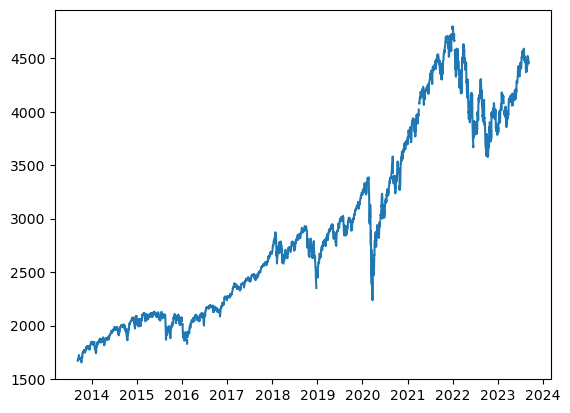

In [5]:
plt.plot(SP500)

In [19]:
#USA

# GDP quarterly, Billions of Dollars , 1947-2023
GDP = fred.get_series('GDP')

#Federal Debt, Quarterly, Millions of Dollars, 1966-2023
FDEBT = fred.get_series('GFDEBTN')/1000

#Consumer Debt, Quarterly, Billions of Dollars, 1945-2023
CDEBT = fred.get_series('CMDEBT')

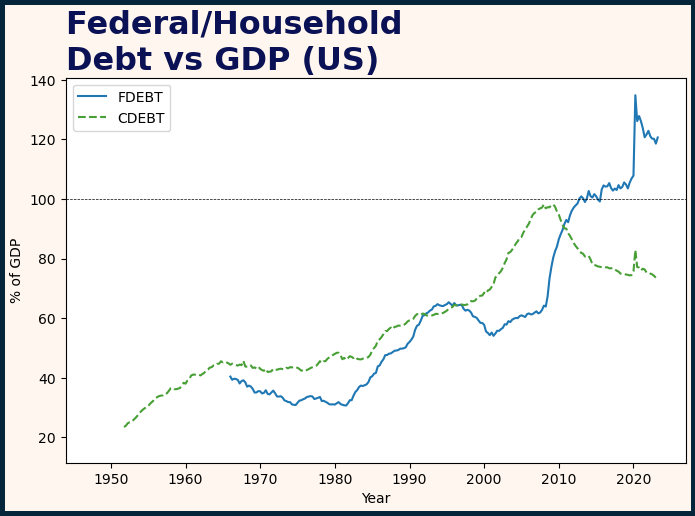

In [97]:
plt.style.use('default')
plt.figure(figsize=(8, 5), facecolor=('#FFF7EF'), linewidth=7, edgecolor="#04253a") 
plt.title(label = '''Federal/Household 
Debt vs GDP (US)''',loc = 'left',fontsize = 23, color = '#0A1255', weight='bold')

#plt.plot(GDP,label = 'GDP', color = '#CB5F5F')
plt.plot(FDEBT/GDP*100, label = 'FDEBT')
plt.plot(CDEBT/GDP*100, label = 'CDEBT',color = '#489F36', linestyle='--')
plt.axhline(y=100, color='black', linestyle='--', linewidth = 0.5) #horizontal line at y=100
plt.legend()

plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.show()

In [8]:
#FRED search function

fred.search('debt canada').T

series id,HDTGPDCAQ163N,GGGDTACAA188N,CANGGXWDGGDP,DEBTTLCAA188A,TOTDTECAQ163N,DDDM06CAA156NWDB,DSAMRIAOAERCA,IDSGFCAMNINICA,GGGDTPCAA188N,DDDM07CAA156NWDB,...,QCAPBMUSDA,CRDQCABPUBIS,CRDQCAAHUBIS,IMMIRIGICA,DMMISTRIAOGGCA,DMMISTRIAONCCA,IBANCADAO,IBANERCAAO,IMMICCCANI,IMMIOICANI
id,HDTGPDCAQ163N,GGGDTACAA188N,CANGGXWDGGDP,DEBTTLCAA188A,TOTDTECAQ163N,DDDM06CAA156NWDB,DSAMRIAOAERCA,IDSGFCAMNINICA,GGGDTPCAA188N,DDDM07CAA156NWDB,...,QCAPBMUSDA,CRDQCABPUBIS,CRDQCAAHUBIS,IMMIRIGICA,DMMISTRIAOGGCA,DMMISTRIAONCCA,IBANCADAO,IBANERCAAO,IMMICCCANI,IMMIOICANI
realtime_start,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,...,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00
realtime_end,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,...,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00,2023-09-09 00:00:00
title,Household Debt to GDP for Canada,General government gross debt for Canada,General Government Gross Debt for Canada,"Central government debt, total (% of GDP) for ...",Total Debt to Equity for Canada,Outstanding International Public Debt Securiti...,Exchange Rate Adjusted Changes of Domestic Deb...,Net Issues of International Debt Securities fo...,Projection of General government gross debt fo...,Outstanding Total International Debt Securitie...,...,Credit to Private Non-Financial Sector by Bank...,Credit to Private Non-Financial Sector by Dome...,Total Credit to Households and Non-Profit Inst...,Gross Issuance of International Money Market i...,Amount Outstanding of Domestic Money Market in...,Amount Outstanding of Domestic Money Market in...,Amounts Outstanding of International Bonds and...,Amounts Outstanding of International Bonds and...,Net Issues of International Money Market Instr...,Net Issues of International Money Market Instr...
observation_start,2005-01-01 00:00:00,1980-01-01 00:00:00,1980-01-01 00:00:00,1995-01-01 00:00:00,2005-01-01 00:00:00,1980-01-01 00:00:00,1989-04-01 00:00:00,1987-01-01 00:00:00,2023-01-01 00:00:00,1980-01-01 00:00:00,...,1954-01-01 00:00:00,1954-01-01 00:00:00,1969-01-01 00:00:00,1993-07-01 00:00:00,1989-01-01 00:00:00,1989-01-01 00:00:00,1993-07-01 00:00:00,1993-07-01 00:00:00,1989-10-01 00:00:00,1989-10-01 00:00:00
observation_end,2023-01-01 00:00:00,2022-01-01 00:00:00,2028-01-01 00:00:00,2021-01-01 00:00:00,2023-01-01 00:00:00,2019-01-01 00:00:00,2022-10-01 00:00:00,2015-04-01 00:00:00,2028-01-01 00:00:00,2019-01-01 00:00:00,...,2022-10-01 00:00:00,2022-10-01 00:00:00,2022-10-01 00:00:00,2015-04-01 00:00:00,2022-10-01 00:00:00,2022-10-01 00:00:00,2015-04-01 00:00:00,2015-04-01 00:00:00,2015-04-01 00:00:00,2015-04-01 00:00:00
frequency,Quarterly,Annual,Annual,Annual,Quarterly,Annual,Quarterly,Quarterly,Annual,Annual,...,"Quarterly, End of Quarter","Quarterly, End of Quarter","Quarterly, End of Quarter",Quarterly,Quarterly,Quarterly,Quarterly,Quarterly,Quarterly,Quarterly
frequency_short,Q,A,A,A,Q,A,Q,Q,A,A,...,Q,Q,Q,Q,Q,Q,Q,Q,Q,Q
units,Ratio,Percent of GDP,Percent of Fiscal Year GDP,Percent of GDP,Ratio,Percent,Millions of US Dollars,Billions of US Dollars,Percent of GDP,Percent,...,Billions of US Dollars,Billions of Canadian Dollars,Billions of Canadian Dollars,Billions of US Dollars,Millions of US Dollars,Millions of US Dollars,Billions of US Dollars,Billions of US Dollars,Billions of US Dollars,Billions of US Dollars
units_short,Ratio,% of GDP,% of Fiscal Yr. GDP,% of GDP,Ratio,%,Mil. of US $,Bil. of US $,% of GDP,%

In [62]:
#Canada

#Federal Debt, % of GDP,Quarterly, 1990-2023
FDEBT_CA = stats_can.sc.vectors_to_df('v62698056', periods = 500)
FDEBT_CA.columns = ['FDEBT_CA']
FDEBT_CA.index.names = ['Date']

#Consumer Debt, % of GDP,Quarterly, 1990-2023
CDEBT_CA= stats_can.sc.vectors_to_df('v62698062', periods = 500)
CDEBT_CA.columns = ['CDEBT_CA']
CDEBT_CA.index.names = ['Date']

In [102]:
CDEBT_CA.CDEBT_CA

Date
1990-01-01     54.02
1990-04-01     55.01
1990-07-01     55.59
1990-10-01     56.23
1991-01-01     56.45
               ...  
2022-01-01    105.73
2022-04-01    105.09
2022-07-01    103.70
2022-10-01    102.93
2023-01-01    102.18
Name: CDEBT_CA, Length: 133, dtype: float64

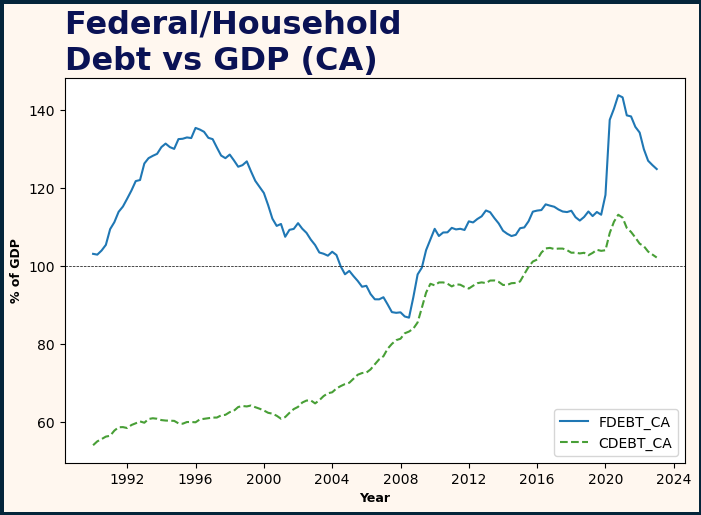

In [93]:
plt.figure(figsize=(8, 5), facecolor=('#FFF7EF'), linewidth=5, edgecolor="#04253a") 
plt.title(label = '''Federal/Household 
Debt vs GDP (CA)''',loc = 'left',fontsize = 23, color = '#0A1255', weight='bold')

#plt.plot(GDP_CA.GDP_CA, label = 'GDP_CA', color = '#CB5F5F')
plt.plot(FDEBT_CA.FDEBT_CA, label = 'FDEBT_CA')
plt.plot(CDEBT_CA, label = 'CDEBT_CA',color = '#489F36', linestyle='--')
plt.axhline(y=100, color='black', linestyle='--', linewidth = 0.5)
plt.legend()

plt.xlabel('Year', fontsize = 9,weight='bold')
plt.ylabel('% of GDP', fontsize = 9,weight='bold')
plt.show()